In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/challenge/web_app/train.csv")

In [3]:
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [4]:
df['output'].value_counts()

1    770
0    508
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

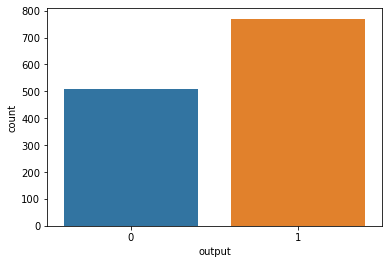

In [5]:
sns.countplot(x='output', data=df)

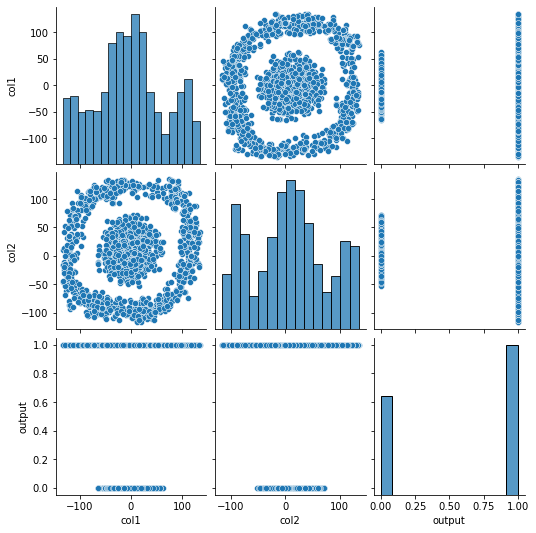

In [29]:
sns.pairplot(df)

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [7]:
X = df.drop(['output'], axis=1)
Y = df['output']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [8]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)

In [9]:
train_score = lr.score(x_train, y_train)
print(train_score)

0.5995525727069351


In [10]:
test_score = lr.score(x_test, y_test)
print(test_score)

0.609375


#### Note : due to the data falling in non-linearly seperable logistic can not work effiiciently

# SVM

In [11]:
# linear model

model_linear = SVC(kernel='linear', C=1)
model_linear.fit(x_train, y_train)

# predict
y_pred = model_linear.predict(x_test)

#Model Performance
tr_score = model_linear.score(x_test, y_test)
print(tr_score)

tes_score = model_linear.score(x_test, y_test)
print(tes_score)

0.609375
0.609375


##### Note : In SVM linear kernal also working as like as logistic . So in this non linear seperable data its not perform well

In [12]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(x_train, y_train)

# predict
y_pred = non_linear_model.predict(x_test)

#Model Performance
tr_rbf_score = non_linear_model.score(x_train,y_train)
print(tr_rbf_score)

tes_rbf_score = non_linear_model.score(x_test,y_test)
print(tes_rbf_score)

1.0
1.0


###### Note : SVM rbf kernal is used to predict the non lenear seperable data so its give very efficient accurary
       so we take this and predict the output

In [28]:
from pickle import dump

dump(non_linear_model, open('D:\Challenge\web_app\pickle\svm_rbf.pkl','wb'))

In [ ]:
from pickle import load
def predict(arr):
        
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('D:/challenge/web_app/pickle/svm_rbf.pkl', 'rb'))
    
    # Prediction
    prediction = classifier.predict(arr)
    
    return prediction

In [ ]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)
 
prediction = predict(arr)
print(prediction)